In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal #para convolución lineal
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier
from scipy.io.wavfile import read, write  #para leer, grabar archivos de audio formato wav

# Tarea 2

Tarea obligatoria para entregarla individualmente pero se recomienda realizarla en grupos (de a 2 o 3 compañera/os), entreguen todos los integrantes consignando cuales fueron los compañerxs

a) Grabar dos audios (o más si quieren!) en formato wav, cada uno con sonido constante y no más de quince segundos de duración.

b) Grabar dos audios en formato wav, cada uno con duración aproximada de 15 segundos, uno con 3 momentos, cada momento con un sonido diferente a los otros dos (ejemplo: sonido de tres letras, aaaa iiiii fffffff, con tonos graves o agudos cada uno, o tres instrumentos y/o notas distintas.) y otro con un sonido que vaya cambiando, tipo agudizar una letra. Jueguen!

Para cada archivo generado en los incisos 1 y 2:

1. Llevar a memoria en Colab.

2. Extraer Fr, la frecuencia de muestreo y guardar la señal en una variable.

3. Calcular la cantidad de muestras (M), la duración de la señal (en segundos) y definir el vector de tiempos discretizados.

4. Grafique la señal en función del tiempo discretizado.

5. Calcular la Transformada de Fourier de la señal. (DFT punto N=M cantidad de muestras)

6. Calcular la transformada de Fourier (punto N=Fr, es decir la cantidad de muestras  en 1s) en tres segundos diferentes de la señal. Analice los resultados de acuerdo a lo que escucha en los audios en esos momentos.

7. En cuanto a lo analizado en el ítem anterior, considera que la señal analizada es estacionaria o no estacionaria? Justifique.

### Ítem 1 y 2

In [8]:
# leer audios y cargar en memoria
gen = read("1generador.wav")
rueda = read("2rueda.wav")
cuerda = read("3cuerda.wav")
monitor = read("4monitor.wav")

freqGen = gen[0]
genAudio = gen[1][:,0]

freqRueda = rueda[0]
ruedaAudio = rueda[1][:,0]

freqCuerda = cuerda[0]
cuerdaAudio = cuerda[1][:,0]

freqMonitor = monitor[0]
monitorAudio = monitor[1][:,0]


### Ítem 3

---------------------------------------------------
GENERADOR    cant. muestras =  522930
GENERADOR    freq. de muestreo =  44100
GENERADOR    tiempo total (duracion) =  11.8578231292517  segundos


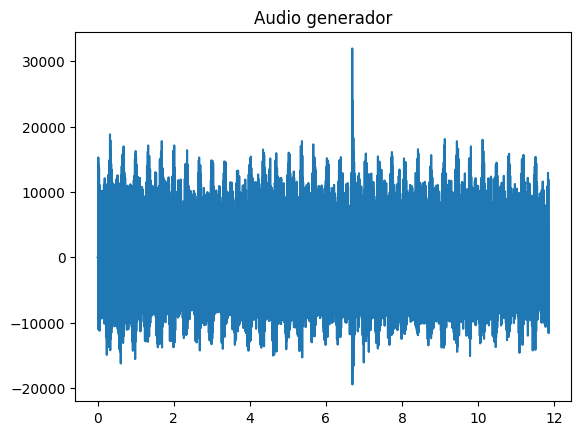

---------------------------------------------------
RUEDA    cant. muestras =  461908
RUEDA    freq. de muestreo =  44100
RUEDA    tiempo total (duracion) =  10.474104308390023  segundos


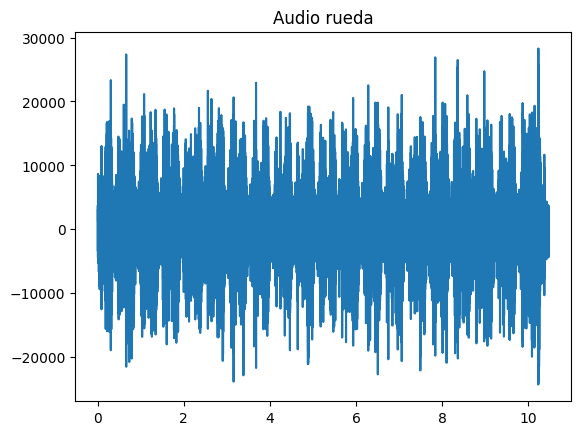

---------------------------------------------------
CUERDA    cant. muestras =  812654
CUERDA    freq. de muestreo =  44100
CUERDA    tiempo total (duracion) =  18.427528344671202  segundos


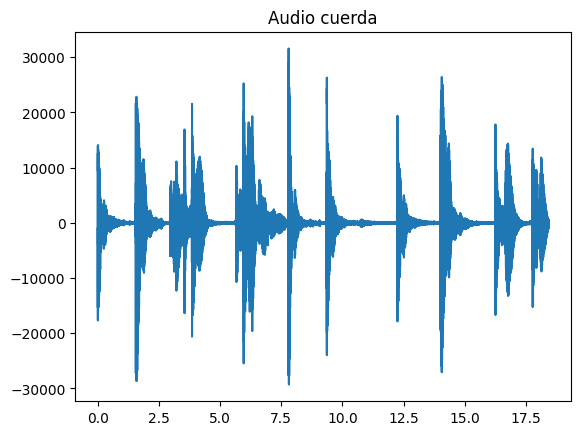

---------------------------------------------------
MONITOR    cant. muestras =  3279580
MONITOR    freq. de muestreo =  44100
MONITOR    tiempo total (duracion) =  74.36689342403628  segundos


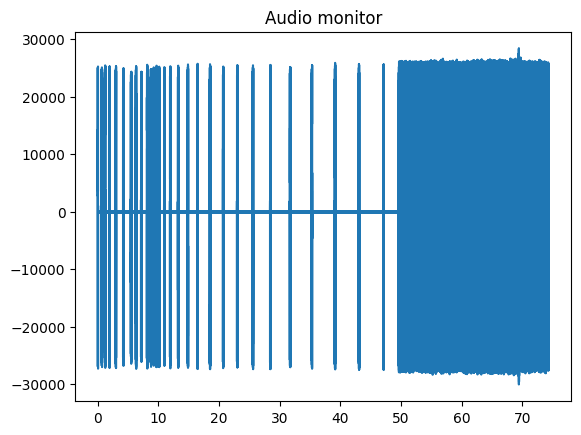

In [9]:
# Calcular la cantidad de muestras (M), la duración de la señal (en segundos) y definir el vector de tiempos discretizados.

Mgen = len(genAudio) # cantidad de muestras
tgen = Mgen/freqGen # regla de 3 simple para sacar el tiempo total
print("---------------------------------------------------")
print("GENERADOR    cant. muestras = ", Mgen)
print("GENERADOR    freq. de muestreo = ", freqGen)
print("GENERADOR    tiempo total (duracion) = ", tgen, " segundos")

Tgen = np.arange(0, Mgen)/freqGen #vector de tiempos discretizados

plt.title("Audio generador")
plt.plot(Tgen, genAudio) # graficamos un solo canal
plt.show()
print("---------------------------------------------------")
Mrueda = len(ruedaAudio) # cantidad de muestras
trueda = Mrueda/freqRueda # regla de 3 simple para sacar el tiempo total
print("RUEDA    cant. muestras = ", Mrueda)
print("RUEDA    freq. de muestreo = ", freqRueda)
print("RUEDA    tiempo total (duracion) = ", trueda, " segundos")

Trueda = np.arange(0, Mrueda)/freqRueda #vector de tiempos discretizados

plt.title("Audio rueda")
plt.plot(Trueda, ruedaAudio) # graficamos un solo canal
plt.show()

print("---------------------------------------------------")
Mcuerda = len(cuerdaAudio) # cantidad de muestras
tcuerda = Mcuerda/freqCuerda # regla de 3 simple para sacar el tiempo total
print("CUERDA    cant. muestras = ", Mcuerda)
print("CUERDA    freq. de muestreo = ", freqCuerda)
print("CUERDA    tiempo total (duracion) = ", tcuerda, " segundos")

Tcuerda = np.arange(0, Mcuerda)/freqCuerda #vector de tiempos discretizados

plt.title("Audio cuerda")
plt.plot(Tcuerda, cuerdaAudio) # graficamos un solo canal
plt.show()

print("---------------------------------------------------")
Mmonitor = len(monitorAudio) # cantidad de muestras
tmonitor = Mmonitor/freqMonitor # regla de 3 simple para sacar el tiempo total
print("MONITOR    cant. muestras = ", Mmonitor)
print("MONITOR    freq. de muestreo = ", freqMonitor)
print("MONITOR    tiempo total (duracion) = ", tmonitor, " segundos")

Tmonitor = np.arange(0, Mmonitor)/freqMonitor #vector de tiempos discretizados

plt.title("Audio monitor")
plt.plot(Tmonitor, monitorAudio) # graficamos un solo canal
plt.show()

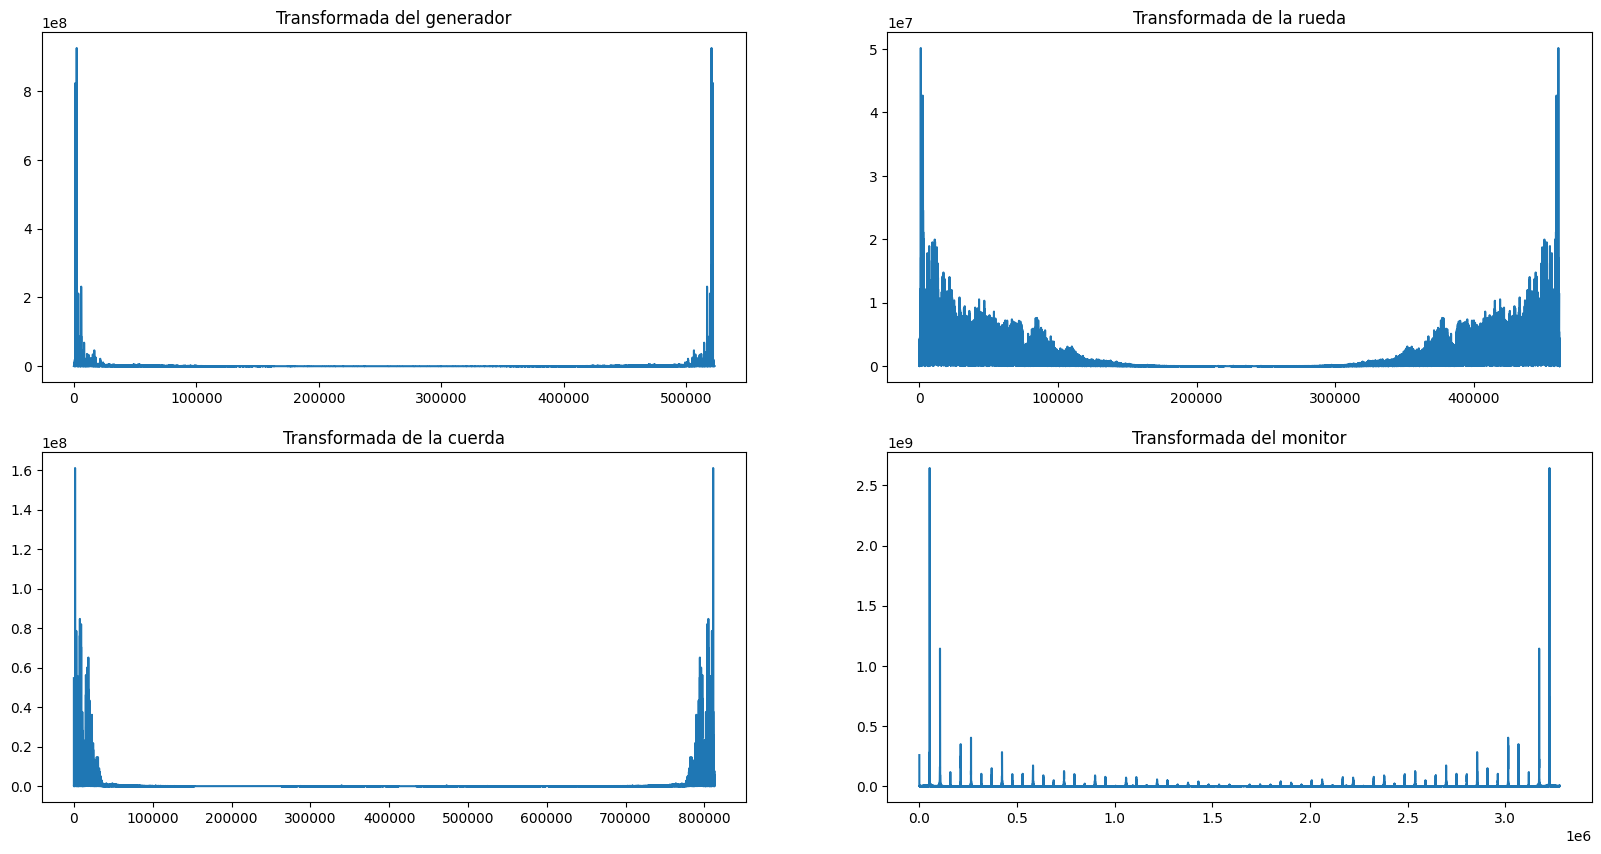

In [10]:
# Calcular la Transformada de Fourier de la señal.

# SEÑAL GENERADOR
fftGen = fft(genAudio, Mgen)

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(abs(fftGen))
plt.title("Transformada del generador")

# SEÑAL RUEDA
fftRueda = fft(ruedaAudio, Mrueda)

plt.subplot(222)
plt.plot(abs(fftRueda))
plt.title("Transformada de la rueda")

# SEÑAL CUERDA
fftCuerda = fft(cuerdaAudio, Mcuerda)

plt.subplot(223)
plt.plot(abs(fftCuerda))
plt.title("Transformada de la cuerda")

# SEÑAL MONITOR
fftMonitor = fft(monitorAudio, Mmonitor)

plt.subplot(224)
plt.plot(abs(fftMonitor))
plt.title("Transformada del monitor")

plt.show()

Calcular la transformada de Fourier (punto N=Fr, es decir la cantidad de muestras  en 1s) en tres segundos diferentes de la señal. Analice los resultados de acuerdo a lo que escucha en los audios en esos momentos

ValueError: num must be an integer with 1 <= num <= 1, not 2

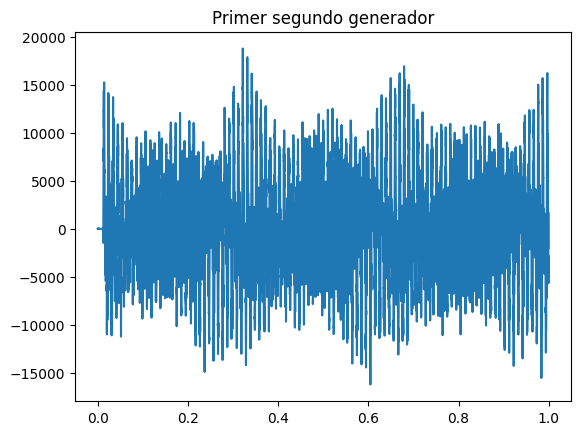

In [33]:
primerSegundo = genAudio[0:freqGen] # el segundo 1 se da de la muestra 0 a l muestra 44100

#print(len(primerSegundo))
#print(len(Tgen))


plt.subplot(111)
plt.title("Primer segundo generador")
plt.plot(Tmonitor[0:freqGen],primerSegundo)

plt.subplot(112)
plt.title("Segundo 1 a 2 de la rueda")
plt.plot(Trueda[freqRueda*3:freqRueda*5], ruedaAudio[freqRueda*3:freqRueda*5])